In [2]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
url = "C:/Users/Akhil Jalla/Desktop/Final Project/Final_part1.csv"
names = ['ROI', 'Foreground Blur Score', 'Background blur score', 'Brightness Score', 'Noise score', 'Simplicity score', 'Contrast score','Area Ratio','Rule of third score','Potrait mode','Landscape Mode','Output']
dataset = pandas.read_csv(url, skiprows=1, names=names)

In [4]:
# shape
print(dataset.shape)

(1600, 12)


In [5]:
print(dataset.head(20))

    ROI  Foreground Blur Score  Background blur score  Brightness Score  \
0     1             816.753390             632.191895         94.225197   
1     1            1349.136240            2966.791954         52.315076   
2     1            1490.677094             695.151423         76.449824   
3     1             634.668559            2980.980330        138.772645   
4     1             667.834364            2127.194413        164.772907   
5     1             435.128876             412.943418        172.468853   
6     1             601.359024             174.562028        187.868041   
7     1             749.033803            4229.251148         93.973348   
8     1            1926.529602             407.819618        133.562073   
9     1             490.835166             483.185990        163.429218   
10    1             494.299914             471.611141        115.038114   
11    1            1174.077420            1167.898805         60.743764   
12    1            1174.8

In [6]:
print(dataset.describe())

               ROI  Foreground Blur Score  Background blur score  \
count  1600.000000            1600.000000            1600.000000   
mean      0.989375            1067.985548             994.336216   
std       0.102561             802.337681            1142.867192   
min       0.000000               0.000000               0.000000   
25%       1.000000             614.679818             404.145307   
50%       1.000000             917.389509             707.511961   
75%       1.000000            1337.966656            1241.471173   
max       1.000000           12008.554350           17149.312060   

       Brightness Score  Noise score  Simplicity score  Contrast score  \
count       1600.000000  1600.000000       1600.000000     1600.000000   
mean         117.280160     2.072803         35.800236       58.847659   
std           43.768638     1.778285         18.518702       17.606168   
min            0.000000     0.000000          0.000000        0.000000   
25%           87.

In [7]:
print(dataset.groupby('Output').size())

Output
0    800
1    800
dtype: int64


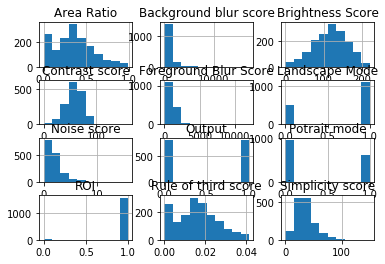

In [8]:
dataset.hist()
plt.show()

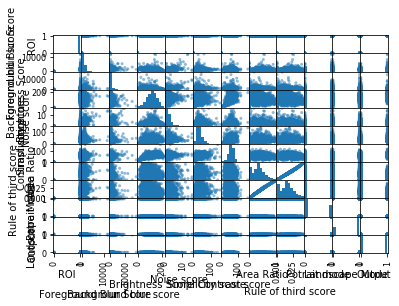

In [9]:
scatter_matrix(dataset)
plt.show()

In [11]:
import numpy as np

In [21]:
Y = np.array(dataset['Output'])
X= dataset.drop('Output', axis = 1)
feature_list = list(X.columns)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8
                                                    ,random_state = 0, shuffle=True)


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

C:\Anaconda3\envs\project\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [24]:
score = model.score(X_test, Y_test)
print(score)

0.828125


In [25]:
prediction = model.predict(X_test)
# prediction = model.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])
print(prediction)

[0 1 0 ... 0 1 0]


In [26]:
print(X.head(10))

   ROI  Foreground Blur Score  Background blur score  Brightness Score  \
0    1             816.753390             632.191895         94.225197   
1    1            1349.136240            2966.791954         52.315076   
2    1            1490.677094             695.151423         76.449824   
3    1             634.668559            2980.980330        138.772645   
4    1             667.834364            2127.194413        164.772907   
5    1             435.128876             412.943418        172.468853   
6    1             601.359024             174.562028        187.868041   
7    1             749.033803            4229.251148         93.973348   
8    1            1926.529602             407.819618        133.562073   
9    1             490.835166             483.185990        163.429218   

   Noise score  Simplicity score  Contrast score  Area Ratio  \
0     0.876805         28.390367       56.670795    0.365508   
1     0.837461         84.586965       47.037664    0.307

In [27]:
print(Y[0:13])

[1 0 0 0 0 0 1 1 1 0 0 0 1]


In [17]:
y = model.feature_importances_

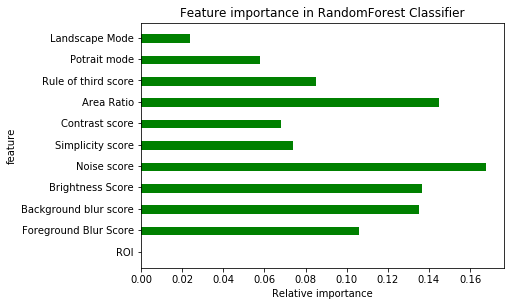

<Figure size 360x360 with 0 Axes>

In [28]:
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(feature_list, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [1]:
from pexels_api import API